In [5]:
# initializing otter-grader
import otter
grader = otter.Notebook()

# Assignment 3: Exploratory Data Analysis in Professional Basketball

In this assignment we'll conduct an exploratory data analysis of professional basketball data.  Basketball is a team sport in which the goal is to try to outscore the amount in a fixed amount of time. Points are scored (either 2 or 3 points) by putting the ball throw a hoop on one end of the court.  An attempt at putting the ball throw the hoop is known as a "shot".  If helpful, you can read more about [the rules of basketball](https://en.wikipedia.org/wiki/Rules_of_basketball).

The National Basketball Association (NBA) is the professional basketball league in the United States and provides a nice website with many statistics gathered on teams and players in the league: [http://stat.nba.com](http://stat.nba.com). 

## Question 1: Managing data files

As seen in lecture, data can be downloaded from NBA using appropriately constructed GET requests. Downloading files from class Jupyterhub cluster do not work; however, you will find all raw data here: https://ucsb.box.com/shared/static/940qiuxyp798gv4nx8iwvazu9qqjs37e.zip

Download and unzip the file to a directory named `data`. You will find three types of files:

* Team data: `commonTeamYears?LeagueID=00&Season=2018-19`
* Player data: `commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0`
* Player's shot data: `shotchartdetail?PlayerID=[PlayerID]&PlayerPosition=&Season=2018-19&ContextMeasure=FGA&DateFrom=&DateTo=&GameID=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&Period=0&Position=&RookieYear=&SeasonSegment=&`

Each player's shot data is identified by replacing `[PlayerID]` with their numeric ID.

### Checking files

Two `PlayerID`s have duplicate files with slightly different names. Locate and remove redudant files. One strategy would be to construct a bash command chain to 

1. List all `shotchartdetail` files (one per line) with `ls ??? shotchartdetail\?PlayerID=*`. What is the option for printing one filename on each row?
1. Extract PlayerIDs from each filename by removing portions around `PlayerID`:  
    _Hint: I used `cut` command to repeatedly split the filename at appropriate symbols. Options `-d` and `-f` might be helpful_  
    Example: `echo 'aaa?bbb=ccc' | cut -d ??? -f ???` (replace `???`)
1. Sort row ordering with `sort`. What is the option to sort numericcally?  
    Example: `echo "1111\n2\n3" | sort ???`
1. Count occurence of each `PlayerID` with `uniq ???`. What option prints duplicated lines?

You would get something like: `ls ??? shotchartdetail\?PlayerID=* | cut -d ??? -f ??? | cut -d ??? -f ??? | sort ??? | uniq | wc ???`.
Assign the result to a python variable named `uniqueshotfiles`: i.e., something like

```
filecount = !ls ??? shotchartdetail\?PlayerID=* \
                | cut -d ??? -f ??? \
                | cut -d ??? -f ??? \
                | sort ??? \
                | uniq ???
```

**Note: Preprocessing of data files will not be part of the grading process. Your commands up until this point do need to be a part of your submitted assignment. When we run your notebook, correct set of files will be provided in `data/` directory**

In [ ]:
!wget -nc -P data https://ucsb.box.com/shared/static/940qiuxyp798gv4nx8iwvazu9qqjs37e.zip
!unzip /home/jovyan/Spring2020/assignments/assignment3/student/data/940qiuxyp798gv4nx8iwvazu9qqjs37e.zip -d data


File ‘data/940qiuxyp798gv4nx8iwvazu9qqjs37e.zip’ already there; not retrieving.

Archive:  /home/jovyan/Spring2020/assignments/assignment3/student/data/940qiuxyp798gv4nx8iwvazu9qqjs37e.zip
replace data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

### Question 1a: Team Data

Read team data file into a pandas data frame named `allteams`.

<!--
BEGIN QUESTION
name: q1a
manual: false
points: 3
-->

In [6]:
%matplotlib inline

import pandas as pd
import numpy as np
import json

json_str = !cat data/commonTeamYears\?LeagueID\=00\&Season\=2018-19
json_obj = json.loads(json_str[0])
allteams = pd.DataFrame(json_obj['resultSets'][0]['rowSet'],columns=json_obj['resultSets'][0]['headers'])


allteams


,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION
0,00,1610612737,1949,2019,ATL
1,00,1610612738,1946,2019,BOS
2,00,1610612740,2002,2019,NOP
3,00,1610612741,1966,2019,CHI
4,00,1610612742,1980,2019,DAL
5,00,1610612743,1976,2019,DEN
6,00,1610612745,1967,2019,HOU
7,00,1610612746,1970,2019,LAC
8,00,1610612747,1948,2019,LAL
9,00,1610612748,1988,2019,MIA


### Question 1b: Player Data

Read players data file with name `data/commonallplayers?LeagueID=00&Season=2018-19&IsOnlyCurrentSeason=0` into a pandas data frame named `allplayers`. Set row index to be `PERSON_ID`. Note the escape symbols from the previous question.
<!--
BEGIN QUESTION
name: q1b
manual: false
points: 3
-->

In [57]:
json_str_players = !cat data/commonallplayers\?LeagueID=00\&Season=2018-19\&IsOnlyCurrentSeason=0
json_obj_players = json.loads(json_str_players[0])
allplayers = pd.DataFrame(json_obj_players['resultSets'][0]['rowSet'],columns=json_obj_players['resultSets'][0]['headers']).set_index('PERSON_ID')
allplayers

,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG,OTHERLEAGUE_EXPERIENCE_CH
PERSON_ID,,,,,,,,,,,,,
76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,0,,,,,Y,00
76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y,00
76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y,00
51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,0,,,,,Y,00
1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y,00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627790,"Zizic, Ante",Ante Zizic,1,2017,2019,ante_zizic,1610612739,Cleveland,Cavaliers,CLE,cavaliers,Y,01
78647,"Zoet, Jim",Jim Zoet,0,1982,1982,HISTADD_jim_zoet,0,,,,,Y,00
78648,"Zopf, Bill",Bill Zopf,0,1970,1970,HISTADD_zip_zopf,0,,,,,Y,00


### Question 1c: Shots Data

Read shotchart data into a _list of pandas data frames_ named `allshotslist` (each file is an data frame item in the list). Filenames have symbols that need to be surrounded by quotes.

Then concate them into a `allshots`. Also, set the row index to be `PLAYER_ID`
<!--
BEGIN QUESTION
name: q1c
manual: false
points: 4
-->

In [55]:
allshotslist = []

files = !ls -1 data/shotchartdetail*
for f in files:
    json_str_shots = !cat '{f}'
    json_obj_shots = json.loads(json_str_shots[0])
    allshotslist += [pd.DataFrame(json_obj_shots['resultSets'][0]['rowSet'], columns = json_obj_shots['resultSets'][0]['headers'])]
    
allshots = pd.concat(allshotslist)
allshots = allshots.set_index(allshots['PLAYER_ID'])
allshots = allshots.drop('PLAYER_ID', axis = 1)
allshots

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
PLAYER_ID,,,,,,,,,,,,,,,,,,,,,
101106,Shot Chart Detail,0021801055,25,Andrew Bogut,1610612744,Golden State Warriors,1,10,39,Made Shot,...,Center(C),Less Than 8 ft.,1,-2,11,1,1,20190318,SAS,GSW
101106,Shot Chart Detail,0021801055,73,Andrew Bogut,1610612744,Golden State Warriors,1,6,7,Made Shot,...,Center(C),Less Than 8 ft.,0,-5,3,1,1,20190318,SAS,GSW
101106,Shot Chart Detail,0021801055,284,Andrew Bogut,1610612744,Golden State Warriors,2,1,55,Made Shot,...,Center(C),Less Than 8 ft.,2,-5,21,1,1,20190318,SAS,GSW
101106,Shot Chart Detail,0021801055,378,Andrew Bogut,1610612744,Golden State Warriors,3,6,19,Missed Shot,...,Center(C),8-16 ft.,8,-17,83,1,0,20190318,SAS,GSW
101106,Shot Chart Detail,0021801062,25,Andrew Bogut,1610612744,Golden State Warriors,1,9,52,Missed Shot,...,Center(C),Less Than 8 ft.,0,4,2,1,0,20190319,MIN,GSW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,Shot Chart Detail,0021801069,271,Trevor Ariza,1610612764,Washington Wizards,2,2,15,Missed Shot,...,Right Side Center(RC),24+ ft.,25,150,202,1,0,20190320,CHI,WAS
2772,Shot Chart Detail,0021801116,42,Trevor Ariza,1610612764,Washington Wizards,1,7,38,Made Shot,...,Center(C),Less Than 8 ft.,5,-25,46,1,1,20190326,LAL,WAS
2772,Shot Chart Detail,0021801116,48,Trevor Ariza,1610612764,Washington Wizards,1,7,13,Missed Shot,...,Right Side Center(RC),24+ ft.,25,169,194,1,0,20190326,LAL,WAS


### Question 1d: Extract Stephen Curry's Shot Data

Use [`allplayers.query()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.query.html) to find the player id (index) associated with the player named "[Stephen Curry](https://en.wikipedia.org/wiki/Stephen_Curry)".  Set the value of `PlayerID` as `curry_id`. 

Subset all of Stephen Curry's shots in a data frame named `curry_data`. Also, set the dtype of `SHOT_MADE_FLAG` to `'bool'` in one command. Something like:  
```
curry_data = allshots.query(???).astype(????)
```

<!--
BEGIN QUESTION
name: q1d
manual: false
points: 6
-->

In [59]:
query_str = 'DISPLAY_FIRST_LAST == "Stephen Curry"'
curry_id = np.int64(201939)
curry_data = allshots.query('PLAYER_ID == 201939').astype({'SHOT_MADE_FLAG':'int'})
curry_id

201939

<!--
BEGIN QUESTION
name: q1d_hidden
manual: false
points: 2
-->

In [ ]:
# leave blank

### Question 1e: Grouping Different Types of Shots

A glossary of basketball terms can be found here: https://stats.nba.com/help/glossary/

Here are some of the key ones:
- Field goal: a basketball shot
- FGA: Field Goals Attempted 
- FGM: Field Goals Made

Group the data by `SHOT_ZONE_RANGE` and call the `size()` function on the resulting `groupby` data frame to get the number of shot attempts in different areas of the court.  Save this in `shot_zone_range`.  How many shots were taken within 8 feet of the basket? How many shots were taken further than 24 feet from the basket? Save these in the appropriate variable below.

<!--
BEGIN QUESTION
name: q1e1
manual: false
points: 6
-->

In [11]:
shot_zone_range = curry_data.groupby("SHOT_ZONE_RANGE").size()
shots_inside_8 = 293
shots_24_plus = 799

<!--
BEGIN QUESTION
name: q1e1_hidden
manual: false
points: 6
-->

In [ ]:
# leave blank

Create a table of counts for `SHOT_ZONE_AREA`.

<!--
BEGIN QUESTION
name: q1e2
manual: false
points: 2
-->

In [12]:
shot_zone_area = curry_data.groupby('SHOT_ZONE_AREA').size()
shot_zone_area.value_counts()

290    1
127    1
309    1
11     1
506    1
97     1
dtype: int64

<!--
BEGIN QUESTION
name: q1e2_hidden
manual: false
points: 2
-->

In [ ]:
# leave blank

### Question 1f: Pivot Table of Shot Types

Use [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) to generate a table with entries representing the fraction of attempted shots that were made (i.e. compute the field goal percentage) by both range and area for each period of the game. Set the rows (`index`) to correspond to the `PERIOD` and the columns corresponding to `SHOT_ZONE_RANGE` and `SHOT_ZONE AREA` (_in that order_).  Fill any missing entries in the pivot table by setting an [appropriate argument](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html).

<!--
BEGIN QUESTION
name: q1f
manual: false
points: 5
-->

In [13]:
FGpercent_table = curry_data.pivot_table(index = 'PERIOD', columns = ['SHOT_ZONE_RANGE','SHOT_ZONE_AREA'], values = 'SHOT_MADE_FLAG', aggfunc=np.mean, fill_value = 0)
FGpercent_table

SHOT_ZONE_RANGE 16-24 ft.                                    \
SHOT_ZONE_AREA  Center(C) Left Side Center(LC) Left Side(L)   
PERIOD                                                        
1                0.444444             0.200000     0.111111   
2                1.000000             0.625000     0.285714   
3                0.428571             0.333333     0.400000   
4                0.300000             0.666667     1.000000   
5                0.000000             0.000000     1.000000   

SHOT_ZONE_RANGE                                       24+ ft.  \
SHOT_ZONE_AREA  Right Side Center(RC) Right Side(R) Center(C)   
PERIOD                                                          
1                            0.411765      1.000000  0.558824   
2                            0.533333      0.500000  0.406250   
3                            0.636364      0.500000  0.437500   
4                            0.250000      0.333333  0.379310   
5                            0.000000      0.000000  0.666667   

SHOT_ZONE_RANGE                                                          \
SHOT_ZONE_AREA  Left Side Center(LC) Left Side(L) Right Side Center(RC)   
PERIOD                                                                    
1                           0.371795     0.636364              0.387097   
2                           0.558824     0.437500              0.351852   
3                           0.506849     0.500000              0.378049   
4                           0.325000     0.461538              0.467742   
5                           0.000000     1.000000              0.000000   

SHOT_ZONE_RANGE                8-16 ft.                             \
SHOT_ZONE_AREA  Right Side(R) Center(C) Left Side(L) Right Side(R)   
PERIOD                                                               
1                    0.500000  0.571429     0.428571      0.500000   
2                    0.400000  0.636364     0.333333      0.285714   
3                    0.619048  0.285714     0.727273      0.375000   
4                    0.000000  0.400000     0.166667      0.500000   
5                    0.000000  0.000000     0.000000      0.000000   

SHOT_ZONE_RANGE Back Court Shot Less Than 8 ft.  
SHOT_ZONE_AREA   Back Court(BC)       Center(C)  
PERIOD                                           
1                      0.333333        0.591837  
2                      0.000000        0.636364  
3                      0.000000        0.573171  
4                      0.000000        0.565217  
5                      0.000000        1.000000

<!--
BEGIN QUESTION
name: q1f_hidden
manual: false
points: 3
-->

In [ ]:
# leave blank

### Question 1g: Interpreting Pivot Table Results

You are interested in identifying whether Stephen Curry has different behavior in different periods of the game.  In a few sentences, discuss how might you identify whether Curry's shot selection is different early in the game (e.g. periods 1 and 2) than later in the game (e.g. periods 3 and 4)?  This is an open ended question and the answer can include looking at visualizations, statistical tests etc.


<!--
BEGIN QUESTION
name: q1g
manual: true
points: 5
-->
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

## Question 2: Visualization

### Question 2a: All Shots Scatter Plot
Use `seaborn` to create scatter plot of the location of Stephen Curry's shot attempts from this year (`LOC_X` and `LOC_Y`).  When you call a scatterplot, seaborn returns a figure in an object, we'll call it `ax`.  We can set properties of the figure by calling methods on `ax`.  Use this approach to set the x-axis limits to span (-300, 300), the y-axis limits to span (-100, 500).

<!--
BEGIN QUESTION
name: q2a
manual: false
points: 5
-->

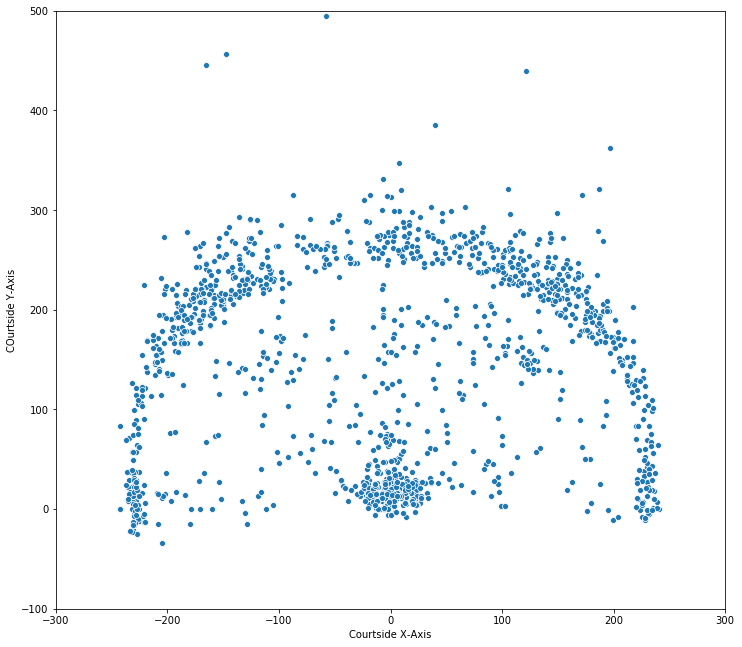

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=[12, 11])
ax = sns.scatterplot(x=curry_data['LOC_X'],y=curry_data['LOC_Y'])

# Set x/y limits and labels
plt.xlim(-300, 300)
plt.ylim(-100, 500)
plt.xlabel("Courtside X-Axis")
plt.ylabel("COurtside Y-Axis")

plt.show()

Understanding any dataset is difficult without context.  Lets add some important context by adding the relevant court lines into our diagram.  If you are interested, you can read more about the lines and dimensions on the [NBA basketball court](https://en.wikipedia.org/wiki/Basketball_court).  We will use code from [http://savvastjortjoglou.com/nba-shot-sharts.html](http://savvastjortjoglou.com/nba-shot-sharts.html) to add the court markings to our diagram.  The `draw_court` function below will do this for us.  The below cell will generate an example court.

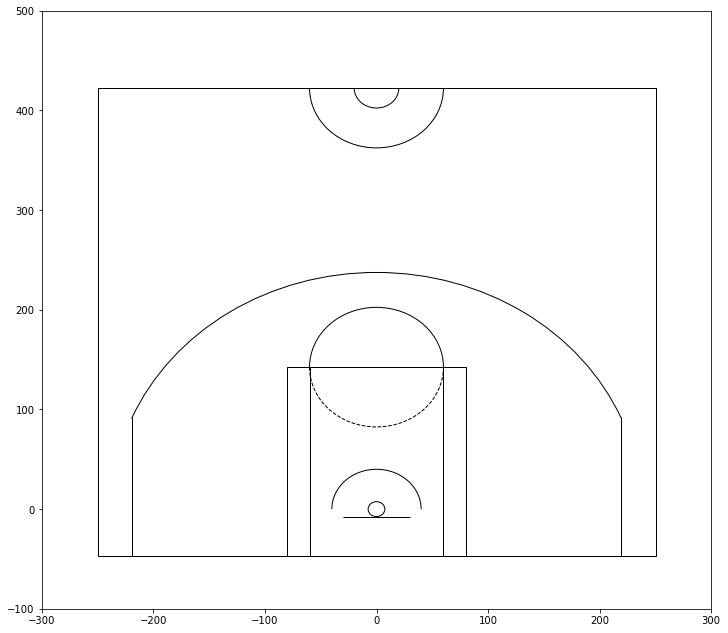

In [15]:
## code is from http://savvastjortjoglou.com/nba-shot-sharts.html
def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    
    from matplotlib.patches import Circle, Rectangle, Arc
    from matplotlib.pyplot import gca
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-219, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((219, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22.5, theta2=157.5, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

### Question 2b: All Shots Scatter Plot + Court Outline

Again use seaborn to make a scatter plot of Stephen Curry's shots. Again, set the x-axis limits to span (-300, 300), the y-axis limits to span (-100, 500) color the points by whether the shot was made or missed.  Set the missed shots to have an 'x' symbol and made shots to be a circular symbol. Call the `draw_court` function with `outer_lines` set to to be true. Save the `Axes` returned by the plot call in a variable called `ax`.

<!--
BEGIN QUESTION
name: q2b1
manual: true
points: 4
-->
<!-- EXPORT TO PDF -->

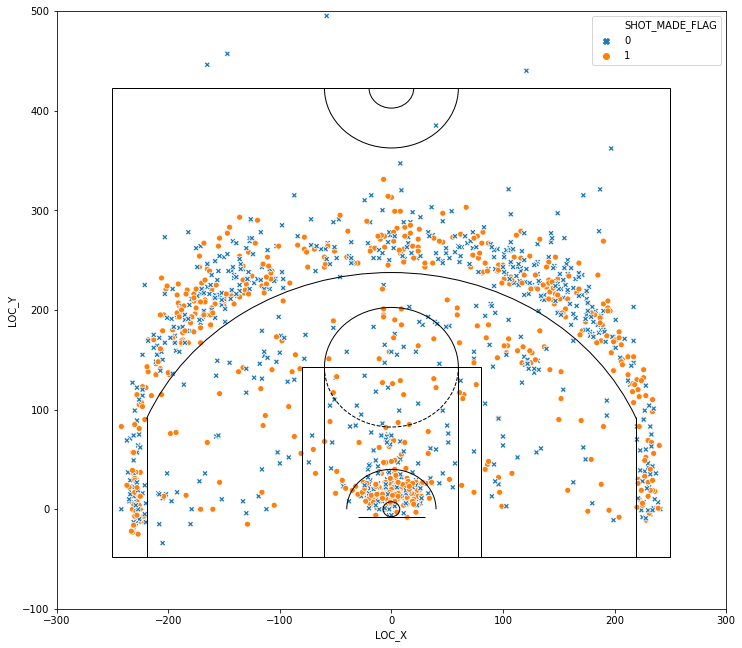

In [16]:
plt.figure(figsize=(12, 11))
markers = {0 : "X", 1 : "o"}
ax = sns.scatterplot(x=curry_data['LOC_X'],y=curry_data['LOC_Y'], hue = curry_data['SHOT_MADE_FLAG'], style = curry_data['SHOT_MADE_FLAG'], markers = markers)
plt.xlim(-300,300)
plt.ylim(-100,500)
draw_court(outer_lines=True)
plt.show()

### Question 2c: Analyzing the Visualization
<!--
BEGIN QUESTION
name: q2c
manual: true
points: 4
-->

In a few sentences, discuss what makes this an effective or ineffective visualization for understanding the types of shots that Stephen Curry likes to take and is good at taking, relative to other players in the league.  Are there ways it can be improved?
<!-- EXPORT TO PDF -->

*Write your answer here, replacing this text.*

### Question 2d: A Hexbin plot

Visualize Stephen Curry's shots by using a [hexbin plot with marginal histograms](https://seaborn.pydata.org/examples/hexbin_marginals.html). Also refer to setting [figure aesthetics](https://seaborn.pydata.org/tutorial/aesthetics.html) for what commands below do.

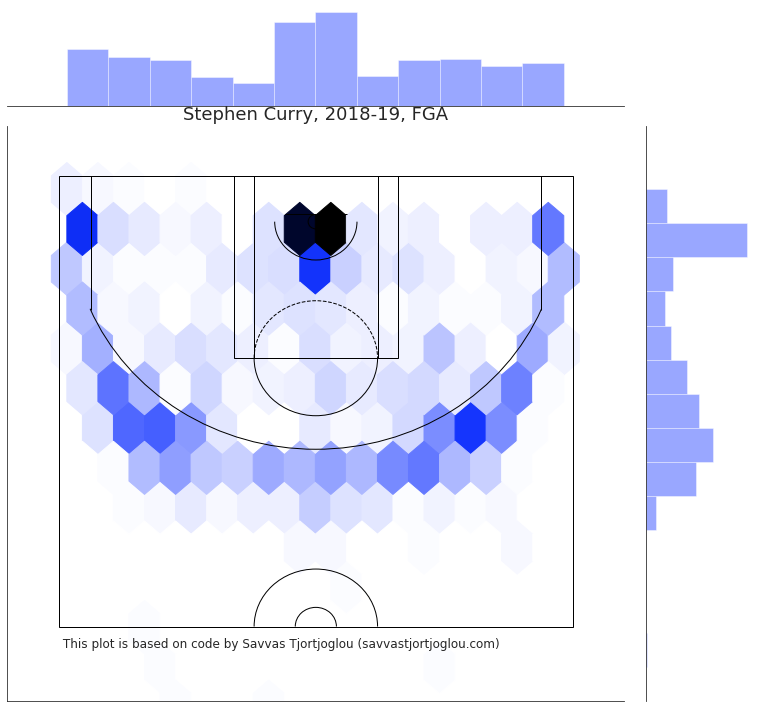

In [17]:
sns.set_style("white")
joint_shot_chart = sns.jointplot(curry_data['LOC_X'],curry_data['LOC_Y'], kind="hex",color="#0023FF")
joint_shot_chart.fig.set_size_inches(12,11)

# A joint plot has 3 Axes, the first one called ax_joint 
# is the one we want to draw our court onto and adjust some other settings
ax = joint_shot_chart.ax_joint
draw_court(ax, outer_lines=True)

# Adjust the axis limits and orientation of the plot in order
# to plot half court, with the hoop by the top of the plot
ax.set_xlim(-300, 300)
ax.set_ylim(500, -100)

# Get rid of axis labels and tick marks
ax.set_xlabel('')
ax.set_ylabel('')
ax.tick_params(labelbottom=False, labelleft=False)

# Add a title
ax.set_title('Stephen Curry, 2018-19, FGA', 
             y=1.2, fontsize=18)

# Add Data Scource and Author
ax.text(-250,445,'\n This plot is based on code by Savvas Tjortjoglou (savvastjortjoglou.com)',
        fontsize=12);

## Question 3: Analyzing Shots from All Players

### Question 3a: Shot Type Average

From all shots taken in 2018-2019, create a DataFrame `shot_counts` of attempted shots in each zone range and area combination (in that order). Then, calculate the fraction of shots taken from range `24+ ft.` in the `Center(C)` shot area.

<!--
BEGIN QUESTION
name: q3a
manual: false
points: 4
-->

In [18]:
shot_counts = allshots.groupby(['SHOT_ZONE_RANGE', 'SHOT_ZONE_AREA']).count().SHOT_ATTEMPTED_FLAG
shot_counts

frac_center24 = shot_counts["24+ ft.","Center(C)"] / np.sum(shot_counts)

frac_center24

0.07297632158590309

<!--
BEGIN QUESTION
name: q3a_hidden
manual: false
points: 2
-->

In [ ]:
# leave blank

### Question 3b: How Many Shots do Players Shoot?

Using `sns.distplot()`, make a histogram of the number of total shots taken per player for all players **with 15 bins**.  Label the x-axis appropriately, set the color of the bars to `green`.

<!--
BEGIN QUESTION
name: q3b1
manual: true
points: 3
-->
<!-- EXPORT TO PDF -->

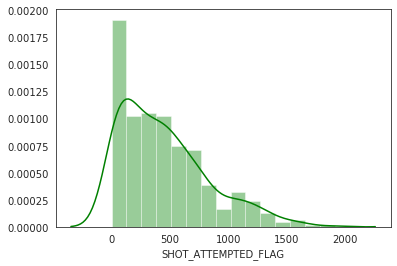

In [32]:
dat = allshots.groupby("PLAYER_ID").count().SHOT_ATTEMPTED_FLAG

shots = sns.distplot(dat, hist=True, color = 'g')
shots

<!--
BEGIN QUESTION
name: q3b2
manual: true
points: 3
-->
What do you observe about the distribution of shot attempts in the NBA across all players? Why might this be? Discuss in 1-3 sentences below.
<!-- EXPORT TO PDF -->

The distributions for the shot attempts for the players will be very diverse. It is due to the reason that there are only a few players who attempt a high number of shots such as over 1,500. The reason for this is because obviously there are players who are better than others and the coaches will want them to focus moreon scoring while the others will focus on getting the ball into the those players hands. 


## Question 4: Binning and Smoothing Shots

So far, in we have worked with dataframes which represent each shot as a single observation (row) within the dataset.  However, this isn't a convenient data structure for the kinds of spatial analyses we will puruse below.  In this part, we will divide the court into square regions and create a matrix which includes the number of shots taken by a player in that region.  We divide the court up into square bins (e.g. a 2d histogram), and, for each player, count number of shots that fall into each bin. Fortunately, this function is relatively simple to write using existing `numpy` functions. 

### Question 4a: 2D Smoothing

Fill in the `bin_shots` function below. Use `np.histgram2d` to count count the shots in each bin.  The bins are defined `bin_edges` which is a pandas Series of the form `(xedges, yedges)`.  If `density = True`, call `ndimage.filters.gaussian_filter` on the result of `np.histogram2d` with smoothing parameter `sigma`.  This will create a smoothed version of the raw data histograms.

<!--
BEGIN QUESTION
name: q4a
manual: false
points: 2
-->

In [33]:
def bin_shots(df, bin_edges, density=False, sigma=1):
    
    """Given data frame of shots, compute a 2d matrix of binned counts is computed
    
    Args:
        df: data frame of shotchartdetail from nba.com. 
            At the minimum, variables named LOCX and LOCY are required.
        bin_edges: bin edge definition: edges in x and edges in y
    
    Returns:
        binned: counts
        xedges: bin edges in X direction
        yedges: bin edges in Y direction
    """
    import numpy as np
    from scipy import ndimage
    
    ## Call np.histogram2d
    binned, xedges, yedges = np.histogram2d(df['LOC_X'], df['LOC_Y'], bins = bin_edges)
    
    if density:

        # Recompute 'binned' using "gaussian_filter"
        binned = ndimage.filters.gaussian_filter(binned, sigma)
        
        # Normalize the histogram to be a "density", e.g. mass across all bins sums to 1.
        binned /= np.sum(binned)
    
    return(binned, xedges, yedges)

### Question 4b: Visualize the binning on `curry_data`

Call `bin_shots` on `curry_data` to create a binned but unsmoothed matrix of shot counts (call this `curry_binned_unsmoothed`), a binned and smoothed matrix of counts with `sigma=1` (call this `curry_binned_smoothed1`) and one with `sigma=5` (call this `curry_binned_smoothed5`). Use the bin edges defined below:

In [34]:
## bin edge definitions in inches
xedges = np.linspace(start=-300, stop=300, num=151)
yedges = np.linspace(start=-48, stop=372, num=106)

In [35]:
bin_edges = (xedges, yedges)

curry_binned_unsmoothed, xe, ye = bin_shots(curry_data, bin_edges, density = False)
curry_binned_smoothed1,  xe, ye = bin_shots(curry_data, bin_edges, density = True, sigma=1)
curry_binned_smoothed5,  xe, ye = bin_shots(curry_data, bin_edges, density = True, sigma=5)

The function below can be used to visualize the shots as a heatmap:

In [36]:
def plot_shotchart(binned_counts, xedges, yedges, ax=None, use_log=False, cmap = 'Reds'):
    
    """Plots 2d heatmap from vectorized heatmap counts
    
    Args:
        hist_counts: vectorized output of numpy.histogram2d
        xedges, yedges: bin edges in arrays
        ax: figure axes [None]
        use_log: will convert count x to log(x+1) to increase visibility [False]
        cmap: Set the color map https://matplotlib.org/examples/color/colormaps_reference.html
    Returns:
        ax: axes with plot
    """
    
    import numpy as np
    import matplotlib.pyplot as plt
    
    ## number of x and y bins.  
    nx = xedges.size - 1
    ny = yedges.size - 1

    X, Y = np.meshgrid(xedges, yedges)
    
    if use_log:
        counts = np.log(binned_counts + 1)
        
    if ax is None:
        fig, ax = plt.subplots(1,1)
    
    ax.pcolormesh(X, Y, binned_counts.T, cmap=cmap) 
    ax.set_aspect('equal')
    
    draw_court(ax)
    
    return(ax)

Create 3 side by side plots of `curry_binned_unsmoothed`, `curry_binned_smoothed1` and `curry_binned_smoothed5`

<!--
BEGIN QUESTION
name: q4b
manual: true
points: 5
-->
<!-- EXPORT TO PDF -->

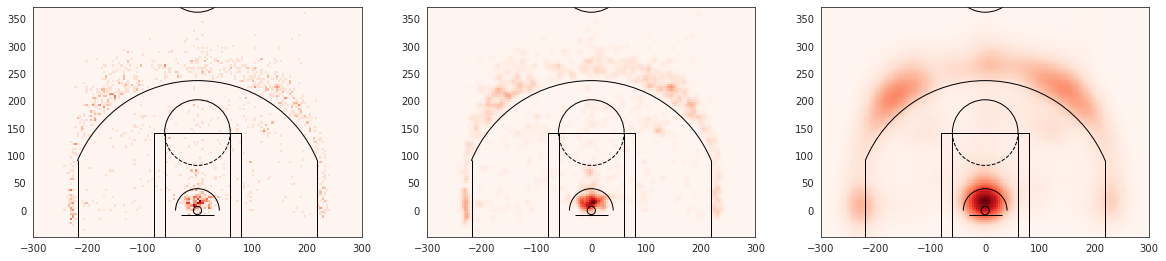

In [37]:
fig, ax = plt.subplots(1, 3, figsize=(20,60))
plot_shotchart(curry_binned_unsmoothed, xe, ye, ax=ax[0])
plot_shotchart(curry_binned_smoothed1, xe, ye, ax=ax[1])
plot_shotchart(curry_binned_smoothed5, xe, ye, ax=ax[2])

fig.show()

### Vectorizing Shot Images

- Here we proceed create a dictionary of smoothed patterns, each vectorized into a 1-d array. 
- In this case, the object `all_smooth` is a dictionary that consists of arrays of length `15750`. 
- Each entry in `all_smooth` represents the smoothed frequency of shots along the bins generated in the code above for a given player.

In [38]:
## number of bins is one less than number of edges (remember homework 1)
nx = xedges.size - 1
ny = yedges.size - 1

## 2d histogram containers for binned counts and smoothed binned counts
all_counts = []
all_smooth = []
pids = []

## 2d histogram containers for binned counts and smoothed binned counts

## data matrix: players (row) by vectorized 2-d court locations (column)
for i, one in enumerate(allshots.groupby('PLAYER_ID')):
    
    ## what does this line do?
    pid, pdf = one
        
    num_shots = len(pdf.index)
    if(num_shots > 100): 
        
        tmp1, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=True, sigma=2)
        tmp2, xedges, yedges = bin_shots(pdf, bin_edges=(xedges, yedges), density=False)
    
        ## vectorize and store into list
        all_smooth += [tmp1.reshape(-1)]
        all_counts += [tmp2.reshape(-1)]
        pids += [pid]
        
X = np.vstack(all_smooth).T
p, n = X.shape

print('Number of shot regions (p):', p)
print('Number of players (n):', n)

Number of shot regions (p): 15750
Number of players (n): 388


## Question 5: Non-negative Matrix Factorization (NMF) 

The non-negative matrix factorization is a dimension reduction technique that is often applied to image data.  It is similar to PCA except that is only applicable for strictly positive data.  We can apply the NMF to vectorized versions of the shot surface. This is useful because we can convert the observed matrix of shot surfaces into:
* Bases: Identifying modes of shooting style (number of modes is determined by `n_components` argument to `NMF` function below)
* Coefficients: How each players shooting style could be expressed as a (positive) linear combination of these bases

The NMF solves the following problem: given some matrix $X$ is $p\times n$ matrix, NMF computes the following factorization:
$$ \min_{W,H} \| X - WH \|_F\\
\text{ subject to } W\geq 0,\ H\geq 0, $$
where $W$ is ${p\times r}$ matrix and $H$ is ${r\times n}$ matrix.

In this homework, we have the following:
 
#### The data matrix $X$ 
$X$ is of dimension $n$={number of players} and $p$={number of total square bins on the court}. Each column corresponds to a player, with entries corresponding to a "flattened" or "vectorized" version of the 2d histograms plotted in part 4b.

#### Bases matrix: $W$

Columns $W_i$ contain the shot "bases". First, we will try it with $r=3$ bins in 5a, and then with $r=10$ bins in 5d.

#### Coefficient matrix: H

Each column of $H$ gives a coefficient for each of the bases vectors in $W$, and there are $n$ columns for each player.


The `sklearn` library is one of the main Python machine learning libraries.  It has a built in NMF function for us.  The function below runs this function and normalizes the basis surfaces to sum to 1.

In [39]:
## Non-negative Matrix Factorization
def non_negative_marix_decomp(n_components, array_data):
    import sklearn.decomposition as skld
    model = skld.NMF(n_components=n_components, init='nndsvda', max_iter=500, random_state=0)
    W = model.fit_transform(array_data)
    
    # Normalize basis vectors to sum to 1
    Wsum = W.sum(axis=0)
    W = W/Wsum
    
    ## fix H correspondingly
    H = model.components_
    H = (H.T * Wsum).T

    nmf = (W, H)
    return(nmf)

### Question 5a: Computing NMF Factorization

Compute the NMF on all player's shot charts, X, assuming with `n_components` = 3 (i.e. each shot chart can be represented as a positive linear combination of 3 "basis" shot charts).  Fill in `plot_vectorized_shot_chart`.  This takes a the a vector of binned shot counts, converts it back to a matrix of the appropriate size and then calls `plot_shotchart` on the matrix.  The numpy function `reshape` will be useful here: [https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)

<!--
BEGIN QUESTION
name: q5a
manual: false
points: 5
-->

In [40]:
W3, H3 = non_negative_marix_decomp(3, X)

<!--
BEGIN QUESTION
name: q5a_hidden
manual: false
points: 2
-->

In [ ]:
# leave blank

### Question 5b: Visualizing Shot Types

Plot the first three basis images by calling `plot_vectorized_shot_chart` below on the columns of `W3`.

<!--
BEGIN QUESTION
name: q5b
manual: true
points: 5
-->
<!-- EXPORT TO PDF -->

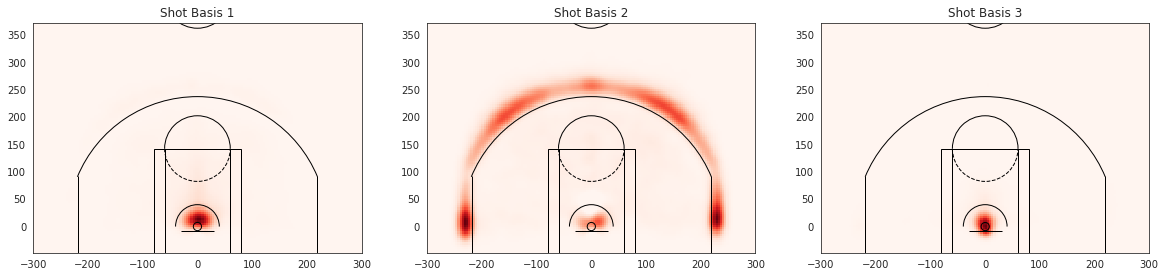

In [41]:
def plot_vectorized_shotchart(vec_counts, xedges, yedges, ax=None, use_log=False, cmap = 'Reds'):
    
    """Plots 2d heatmap from vectorized heatmap counts
    
    Args:
        hist_counts: vectorized output of numpy.histogram2d
        xedges, yedges: bin edges in arrays
        ax: figure axes [None]
        use_log: will convert count x to log(x+1) to increase visibility [False]
        cmap: Set the color map https://matplotlib.org/examples/color/colormaps_reference.html
    Returns:
        ax: axes with plot
    """

    nx = xedges.size - 1
    ny = yedges.size - 1
    
    # use reshape to convert a vectorized counts back into a 2d histogram
    two_d_counts = vec_counts.reshape((nx,ny))
    
    return(plot_shotchart(two_d_counts, xedges, yedges, ax=ax, use_log=use_log, cmap=cmap))

fig, ax = plt.subplots(1, 3, figsize=(20,60))

## Write a for loop
for i in range(3):
    # Call plot_vectorized_shot_chart
    ax[i].set_title('Shot Basis %i' % (i+1))
    plot_vectorized_shotchart(W3[:,i], xedges, yedges, ax=ax[i], use_log=False, cmap = 'Reds')


### Question 5c: Reconstruction Error

Below we re-construct the shooting pattern for a single player. By "reconstructing" we mean use the approximation $$\hat{X} = WH$$ obtained via NMF.  Find $\hat X$ by multipling W and H.  In python the `@` symbol is used for matrix multiplication.

<!--
BEGIN QUESTION
name: q5c
manual: true
points: 5
-->
<!-- EXPORT TO PDF -->

In [42]:
X3_hat = W3@H3
X3_hat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Plot $X$, $\hat X$ and the residual ($X - \hat X$) for the player named LaMarcus Aldridge. Remember, each column of $X$ is a vectorized matrix corresponding to the binned (or smoothed binned) shot information.

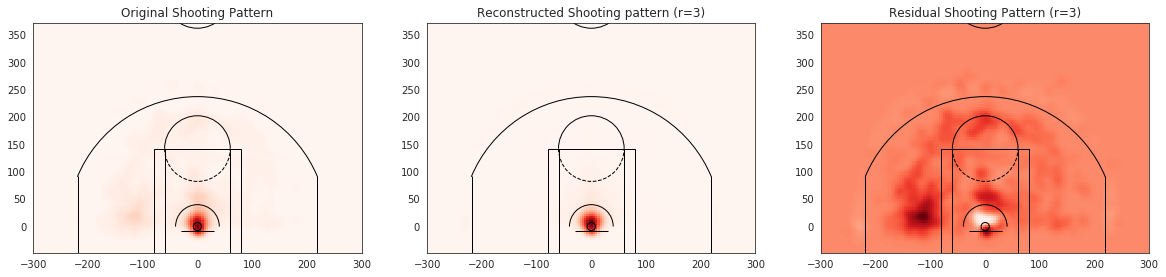

In [43]:
# Find the player_id of LaMarcus Aldridge
player_id = np.int64(200746)

## find index in X corresponding to that player
to_plot_idx = np.where(pids == player_id)[0][0]

fig, ax = plt.subplots(1, 3, figsize=(20,60))

## Call plot_vectorized_shot_chart
original_shotchart = plot_vectorized_shotchart(X[:,to_plot_idx], xedges, yedges, ax=ax[0], use_log=False, cmap = 'Reds')
reconstructed_shotchart = plot_vectorized_shotchart(X3_hat[:, to_plot_idx], xedges, yedges, ax=ax[1], use_log=False, cmap = 'Reds')
residual_chart = plot_vectorized_shotchart(X[:,to_plot_idx]-X3_hat[:, to_plot_idx], xedges, yedges, ax=ax[2], use_log=False, cmap = 'Reds')

# print(max(abs(X3_hat[:, to_plot_idx] - X[:, to_plot_idx])))
ax[0].set_title('Original Shooting Pattern')
ax[1].set_title('Reconstructed Shooting pattern (r=3)')
ax[2].set_title('Residual Shooting Pattern (r=3)')
fig.show()

### Question 5d: Choice of Colormap

Why does it make sense to use a _sequential_ palette for the original and reconstructed shot charts and a _diverging_ palette for the residual?  _Hint:_ Read the introduction to colormaps [here](https://matplotlib.org/users/colormaps.html). 


<!--
BEGIN QUESTION
name: q5d
manual: true
points: 3
-->
<!-- EXPORT TO PDF -->

Since the sequesntial palette contrasts well betwen light to dark, it makes sense to use the sequential pallete for the original and reconstructed shot charts. 

The diverging palette is better for the residuals because it is two different colors so we can identify where he never shoots and where he shoots a lot.


What areas of the court does this player to shoot more and where less relative to the reconstructed area.  If its helpful, you can refer to court locations by name using this legend [here](https://en.wikipedia.org/wiki/Basketball_court#/media/File:Basketball_terms.png]).

From the graph we can see that the player tends to shoot more mid range shots and lay-ups.  He rarely shoots 3 point shots.  This is likely due to the fact that he plays the forward position and likes to attack the rim.  The player is also a old veteran player which means that he did not live through the 3 point age so it explains he stayed true to the old NBA play-style.


### Question 5e: More Detailed Modeling

Re-run the analysis, this time for 10 basis vectors instead of 3.  Again plot the bases using `plot_vectorized_shotchart` on the columns of `W10`.

<!--
BEGIN QUESTION
name: q5e1
manual: true
points: 3
-->
<!-- EXPORT TO PDF -->

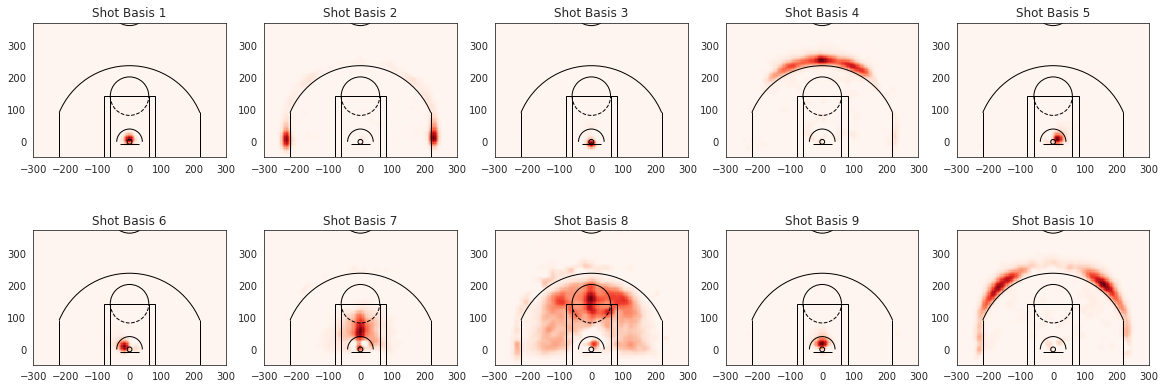

In [44]:
W10, H10 = non_negative_marix_decomp(10, X)

fig, ax = plt.subplots(2, 5, figsize=(20, 7))

## Write a for loop
for i in range(10):
    ax[i//5, i % 5].set_title('Shot Basis %i' % (i+1))
    plot_vectorized_shotchart(W10[:,i], xedges, yedges, ax=ax[i//5, i%5], use_log=False, cmap = 'Reds')


If you did things correctly, you should be really impressed! We've identified potentially interesting patterns of shooting styles without actually specifying anything about the way basketball is played or where the relevant lines are on the court.  The resulting images are based only on the actual behavior of the players.  Even more impressive is that we're capturing similarity in regions that are far apart on the court.  One reason we can do this is that a basketball court is symmetric along the length of the court (i.e. symmetric about x=0).  However, people tend to be left or right hand dominant, which might affect their preferences.  Look carefuly at the shot basis plots above: is there any evidence of _asymmetry_ in player shooting behavior?  Refer to specific basis images in your answer.    


<!--
BEGIN QUESTION
name: q5e2
manual: true
points: 3
-->
<!-- EXPORT TO PDF -->

There doesn't appear to be much evidence of asymmetry in player shooting behavior.  However, there is a small amount.  Shot Basis 10 shows that the 3 point shots to the "right" facing the basket, i.e. in the x coordinated (-200,-100) are more spread out than the 3 point shots to the "left" facing the basket.



Repeat part 5b, and again plot original, reconstructed and residual shot chats for LaMarcus Aldridge.


<!--
BEGIN QUESTION
name: q5e3
manual: true
points: 3
-->
<!-- EXPORT TO PDF -->

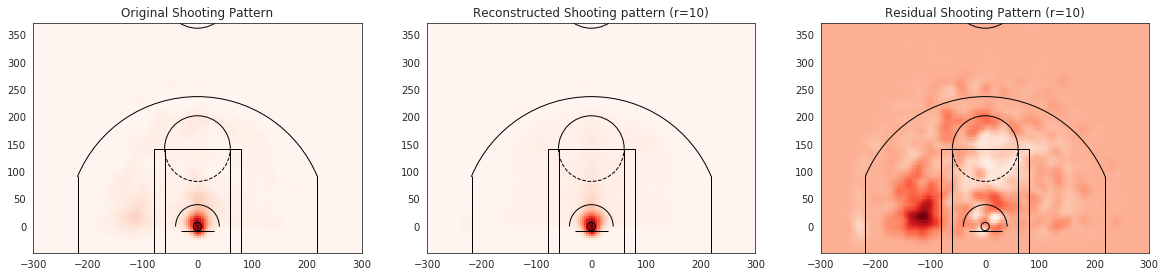

In [45]:
X10_hat = W10@H10

fig, ax = plt.subplots(1, 3, figsize=(20,60))

# I took the first player appearing in first column 
# (you probably want to do more interesting players)
original_shotchart = plot_vectorized_shotchart(X[:,to_plot_idx], xedges, yedges, ax=ax[0], use_log=False, cmap = 'Reds')
reconstructed_shotchart = plot_vectorized_shotchart(X10_hat[:, to_plot_idx], xedges, yedges, ax=ax[1], use_log=False, cmap = 'Reds')
residual_chart = plot_vectorized_shotchart(X[:,to_plot_idx]-X10_hat[:, to_plot_idx], xedges, yedges, ax=ax[2], use_log=False, cmap = 'Reds')

ax[0].set_title('Original Shooting Pattern')
ax[1].set_title('Reconstructed Shooting pattern (r=10)')
ax[2].set_title('Residual Shooting Pattern (r=10)');

### Question 5f: Comparing Players 

With `H10` matrix, it is possible to compare any pair of players. For all players pairwise, $i$ and $j$, compare using euclidean distance between their coefficients:

$$ \text{player-distance}(i,j) = \| H_i - H_j \|_2 = \left(\sum_{k=1}^{10} (H_{ki} - H_{kj})^2 \right)^{1/2} $$

Create a heatmap for comparing pair-wise player distance matrix. Find the two pairs of players with smallest distances. Also, find two pairs of players with largest distances.

<!--
BEGIN QUESTION
name: q5f
manual: true
points: 10
-->
<!-- EXPORT TO PDF -->

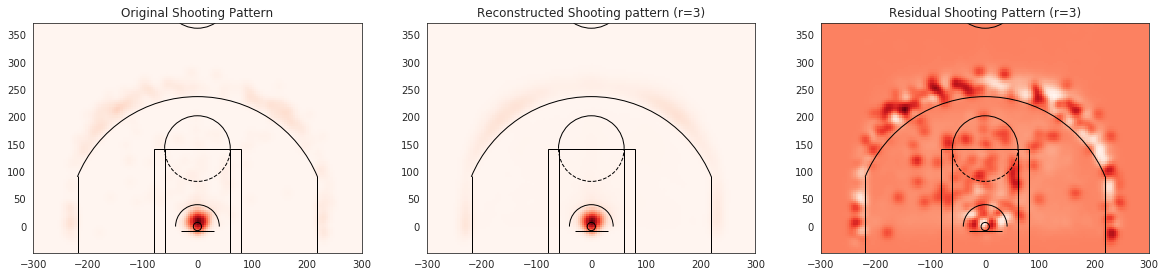

In [30]:
allplayers.query('DISPLAY_FIRST_LAST == "Lonzo Ball"')
ball_id = np.int64(1628366)

to_plot_idx1 = np.where(pids == ball_id)[0][0]

fig, ax = plt.subplots(1, 3, figsize=(20,60))

original_shotchart = plot_vectorized_shotchart(X[:,to_plot_idx1], xedges, yedges, ax=ax[0], use_log=False, cmap = 'Reds')
reconstructed_shotchart = plot_vectorized_shotchart(X10_hat[:, to_plot_idx1], xedges, yedges, ax=ax[1], use_log=False, cmap = 'Reds')
residual_chart = plot_vectorized_shotchart(X[:,to_plot_idx1]-X10_hat[:, to_plot_idx1], xedges, yedges, ax=ax[2], use_log=False, cmap = 'Reds')

ax[0].set_title('Original Shooting Pattern')
ax[1].set_title('Reconstructed Shooting pattern (r=3)')
ax[2].set_title('Residual Shooting Pattern (r=3)')
fig.show()

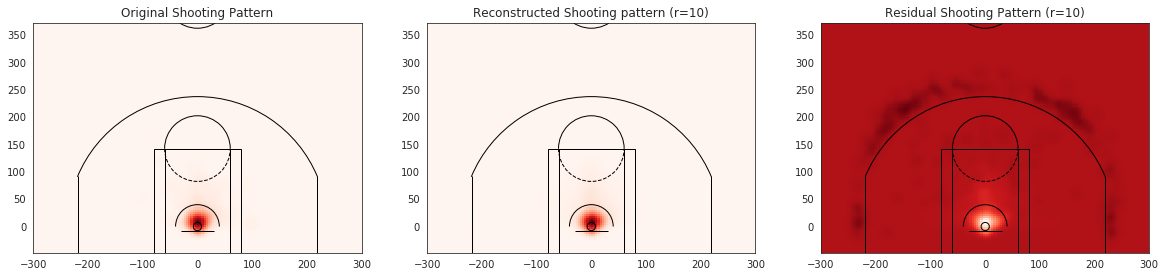

In [31]:
allplayers.query('DISPLAY_FIRST_LAST == "Ben Simmons"')
simmons_id = np.int64(1627732)
to_plot_idx2 = np.where(pids == simmons_id)[0][0]

fig, ax = plt.subplots(1, 3, figsize=(20,60))

original_shotchart = plot_vectorized_shotchart(X[:,to_plot_idx2], xedges, yedges, ax=ax[0], use_log=False, cmap = 'Reds')
reconstructed_shotchart = plot_vectorized_shotchart(X10_hat[:, to_plot_idx2], xedges, yedges, ax=ax[1], use_log=False, cmap = 'Reds')
residual_chart = plot_vectorized_shotchart(X[:,to_plot_idx1]-X10_hat[:, to_plot_idx2], xedges, yedges, ax=ax[2], use_log=False, cmap = 'Reds')

ax[0].set_title('Original Shooting Pattern')
ax[1].set_title('Reconstructed Shooting pattern (r=10)')
ax[2].set_title('Residual Shooting Pattern (r=10)')
fig.show()

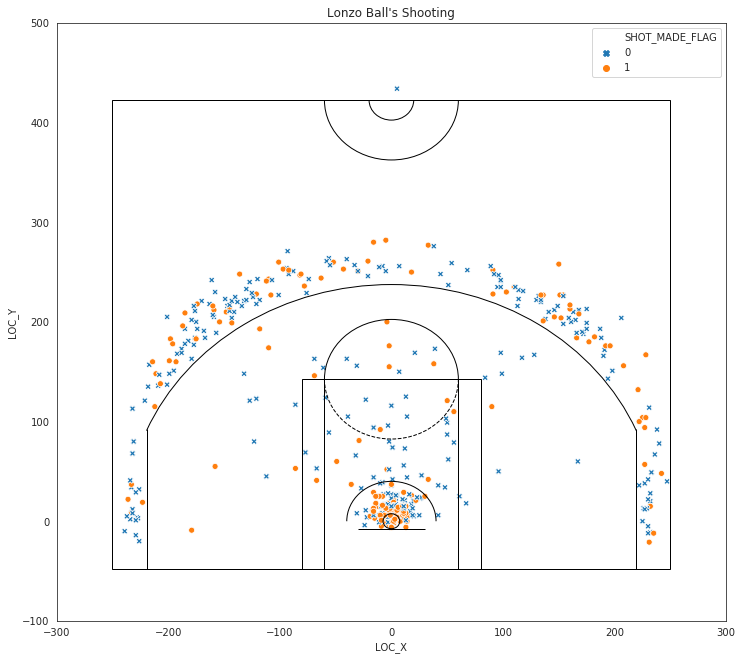

In [34]:
ball_data = allshots.query('PLAYER_ID == 1628366').astype({'SHOT_MADE_FLAG':'int'})

plt.figure(figsize=(12, 11))
markers = {0 : "X", 1 : "o"}
ax = sns.scatterplot(x=ball_data['LOC_X'],y=ball_data['LOC_Y'], hue = ball_data['SHOT_MADE_FLAG'], style = ball_data['SHOT_MADE_FLAG'], markers = markers)
plt.xlim(-300,300)
plt.ylim(-100,500)
ax.set_title("Lonzo Ball's Shooting")
draw_court(outer_lines=True)
plt.show()

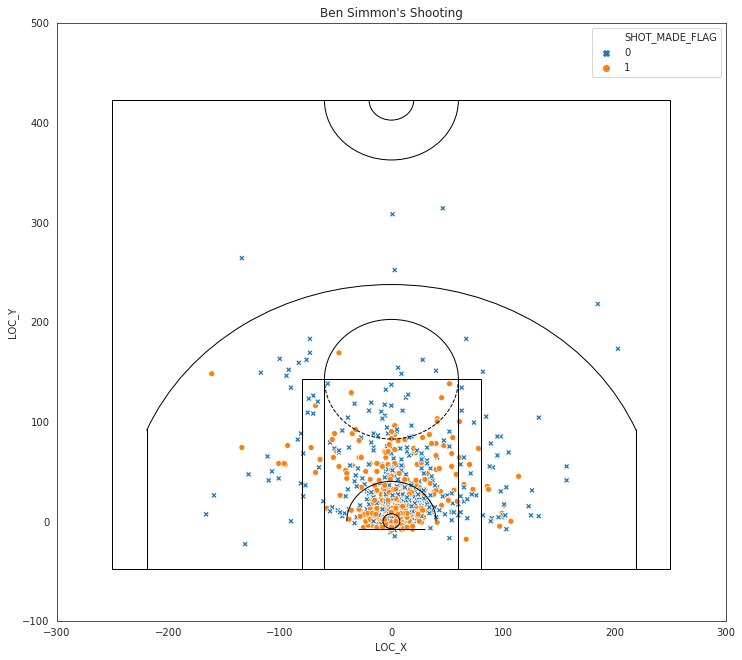

In [36]:
simmons_data = allshots.query('PLAYER_ID == 1627732').astype({'SHOT_MADE_FLAG':'int'})

plt.figure(figsize=(12, 11))
markers = {0 : "X", 1 : "o"}
ax = sns.scatterplot(x=simmons_data['LOC_X'],y=simmons_data['LOC_Y'], hue = simmons_data['SHOT_MADE_FLAG'], style = simmons_data['SHOT_MADE_FLAG'], markers = markers)
plt.xlim(-300,300)
plt.ylim(-100,500)
ax.set_title("Ben Simmon's Shooting")
draw_court(outer_lines=True)
plt.show()

Between the two guards, we can see that Lonzo shoots much more, but he misses more. Simmons on the other hand rarely takes shots far away because he knows his skills. The heatmaps show that Simmons takes up most his time right next to basket which means that he prefers to lay the ball up or dunk. 

### Question 5g: Residuals

The residual betwene `Xhat` and `X` gives a sense of how well a player is decribed by NMF computed matrices `W` and `H`. Calculate RMSE for each player, and plot the histogram. Comment on this distribution and players with smallest and largest RMSEs.

<!--
BEGIN QUESTION
name: q5g
manual: true
points: 10
-->
<!-- EXPORT TO PDF -->

Montrezl Harrell is the smallest rmse with 2.244235831256383e-05
Brad Wanamaker is the biggest rmse with 0.00010946061707727097


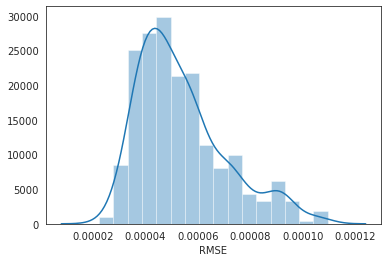

In [49]:
rmse = []
for i in range(X.shape[1]):
    rmse.append((np.nanmean((X[:,i]-X10_hat[:,i])**2))**(1/2))
    
sns.distplot(rmse, axlabel = 'RMSE')

smol_rmse = min(rmse)
big_rmse = max(rmse)

smol_id = pids[rmse.index(smol_rmse)]
big_id = pids[rmse.index(big_rmse)]

smol_player = allplayers.loc[smol_id, "DISPLAY_FIRST_LAST"]
big_player = allplayers.loc[big_id, "DISPLAY_FIRST_LAST"]

print(smol_player + " is the smallest rmse with " + str(smol_rmse))
print(big_player + " is the biggest rmse with " + str(big_rmse))


As we can see, the graph is skewed slightly to the right. Also, about half of the players had a rmse over 0.00005.

### Question 5h: Proposing improvements

One of the main purposes of exploratory data analysis is to generate new ideas, directions, and hypothesis for future analyses and experiments. Take two players of your choice and compare their shooting patterns with various visualizations.

State any insights and defend your conclusions with visual and/or numerical comparisons.

<!--
BEGIN QUESTION
name: q5h
manual: true
points: 10
-->
<!-- EXPORT TO PDF -->

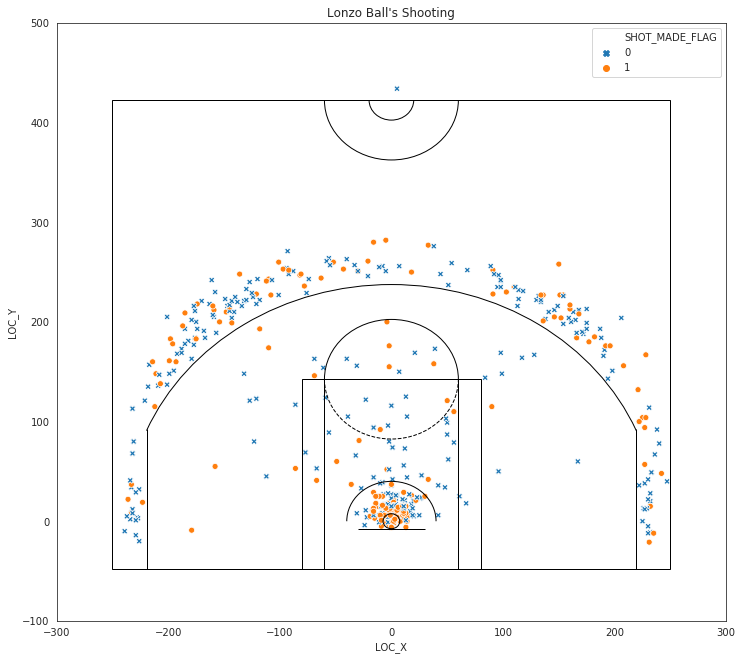

In [50]:
ball_data = allshots.query('PLAYER_ID == 1628366').astype({'SHOT_MADE_FLAG':'int'})

plt.figure(figsize=(12, 11))
markers = {0 : "X", 1 : "o"}
ax = sns.scatterplot(x=ball_data['LOC_X'],y=ball_data['LOC_Y'], hue = ball_data['SHOT_MADE_FLAG'], style = ball_data['SHOT_MADE_FLAG'], markers = markers)
plt.xlim(-300,300)
plt.ylim(-100,500)
ax.set_title("Lonzo Ball's Shooting")
draw_court(outer_lines=True)
plt.show()

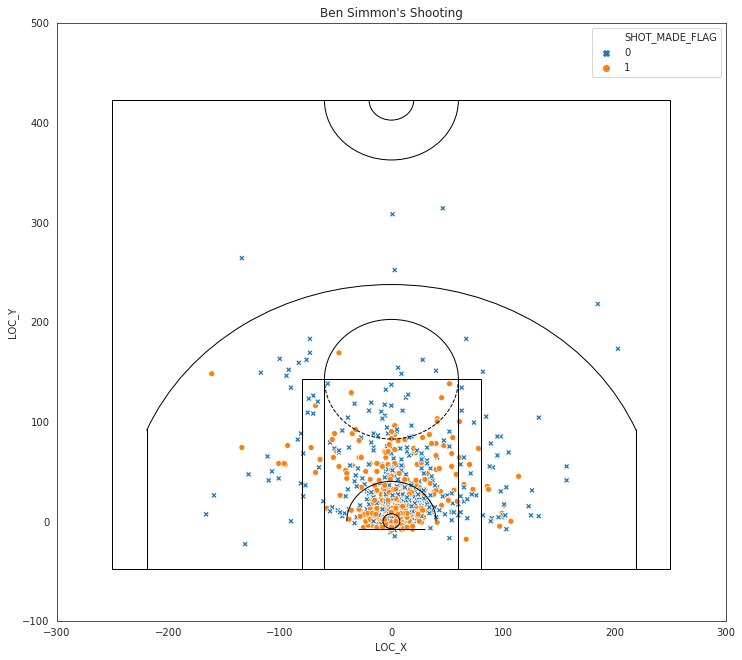

In [51]:
simmons_data = allshots.query('PLAYER_ID == 1627732').astype({'SHOT_MADE_FLAG':'int'})

plt.figure(figsize=(12, 11))
markers = {0 : "X", 1 : "o"}
ax = sns.scatterplot(x=simmons_data['LOC_X'],y=simmons_data['LOC_Y'], hue = simmons_data['SHOT_MADE_FLAG'], style = simmons_data['SHOT_MADE_FLAG'], markers = markers)
plt.xlim(-300,300)
plt.ylim(-100,500)
ax.set_title("Ben Simmon's Shooting")
draw_court(outer_lines=True)
plt.show()

Here i used the example that I have used in 5f. I used Lonzo Ball and Ben Simmons who are notoriously known for their horrible shooting(no disrespect). 

We can clearly see that Lonzo Ball has shot more shots outside the three point line, but he missed most of them. Also, he missed a lot of the midrange points. This leaves us at the spot inside the line and he made most of those which is mostly lay-ups and postups. 

Ben Simmons who is known as a powerful point guard who is old school. By old school, I mean that he shoots mostly midrange and also focus's on laying the ball in from the paint. Since Ben Simmons knows his weekness as a shooter, we can see from the graph that he does not shoot much from the three point line, but the ones he did, he missed. The paint looks almost perfect and clearly we can see that Simmons has a higher shot percentage than Lonzo Ball. 


# Running Built-in Tests
1. All tests are in `tests` directory
1. Each python file in `tests` is a test
1. `grader.check('testname')` runs test `'testname'`, e.g. `'q1'`
1. `grader.check_all()` runs all visible tests

In [60]:
# Run built-in checks
grader.check_all()

In [ ]:
# Uncomment to generate pdf in classic notebook (does not work in JupyterLab):
# import nb2pdf
# nb2pdf.convert('assignment3.ipynb')

# Uncomment to generate pdf using command-line tool:
# ! nb2pdf assignment3.ipynb

# Submission Checklist
1. Check filename is `assignment3.ipynb`
1. Save file to confirm all changes are on disk
1. Run *Kernel > Restart & Run All* to execute all code from top to bottom
1. Check `grader.check_all()` output
1. Save file again to write any new output to disk
1. Check generated pdf that all responses are displayed correctly
1. Submit `assignment3.ipynb` and `assignment3.pdf` to Gradescope